In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys, os, shutil
import random
import fnmatch

# This script is for the diffusor 

In [3]:
def discover_files(path):
    '''
    Looks in the given directory and returns the filenames
    '''
    for (dirpath, dirnames, filenames) in os.walk(path):
        break
    return filenames

In [25]:
img_list = discover_files('/Volumes/harddrive/Lab_1stJune/Cutouts/Diffusor_cutouts')

In [42]:
focus_metric = []
for i in img_list[:-1]:
    focus_metric.append(float(i.split('_')[1]))

In [36]:
focus_metric.append(float(img_list[-1].split('_')[2]))

In [ ]:
focus_ax = (sorted(focus_metric, key=lambda z: float(z)))   # sort float ascending 

# Plan
Make 10 batches of cutouts. The interval between batches is 65291. In total it takes 10 interval with the same size up to 655476 (highest focus metric). Then take 100 cutouts randomly from each batch and put them in a new folder for further analysis. The nummber of cutouts inside each batch is as following:

- 1st batch (metric:2565-65291) contains 1155 cutouts.


- 2nd batch (metric:65291-130582) contains 1297 cutouts.


- 3rd batch (metric:130582-195873) contains 1052 cutouts.


- 4th batch (metric:195873-261164) contains 593 cutouts.


- 5th batch (metric:261164-326455) contains 519 cutouts.


- 6th batch (metric:326455-391746) contains 609 cutouts.


- 7th batch (metric:391746-457037) contains 217 cutouts.


- 8th batch (metric:457037-522328) contains 26 cutouts.


- 9th batch (metric:522328-587619) contains 11 cutouts.


- 10th batch (metric:587619-655476) contains 3 cutouts.


In [163]:
path = '/Volumes/harddrive/Lab_1stJune/Cutouts/Diffusor_cutouts'

dest = '/Volumes/harddrive/Lab_1stJune/random/random_diffusor/batch10'

files = os.listdir(path)

for file in files:
    if (587619 <= float(file.split('_')[1]) <= 655476):
        mainpath = os.path.join(path, file)
        shutil.copy(mainpath, dest)

In [162]:
b = []
for file in files:
    if (587619 <= float(file.split('_')[1]) <= 655476):
        #print(file)
        #print(file)
        b.append(file) 
        
np.array(b).shape

(3,)

In [164]:
#random.sample(focus_ax, 50)
source = '/Volumes/harddrive/Lab_1stJune/random/random_diffusor/batch7'
destination = '/Volumes/harddrive/Lab_1stJune/random/random_diffusor/random_100/b7_100'

files = os.listdir('/Volumes/harddrive/Lab_1stJune/Cutouts/Diffusor_cutouts')

#b2 = []
#for file in files:
    #if (65291.1 <= file <= 130582):
        #print(file)
        #print(file)
        #b2.append(file)    
        
filenames = random.sample(os.listdir(source), 100)

for fname in filenames:
    srcpath = os.path.join(source, fname)
    shutil.copy(srcpath, destination)

#np.array(b1).shape
#filenames

<IPython.core.display.Javascript object>


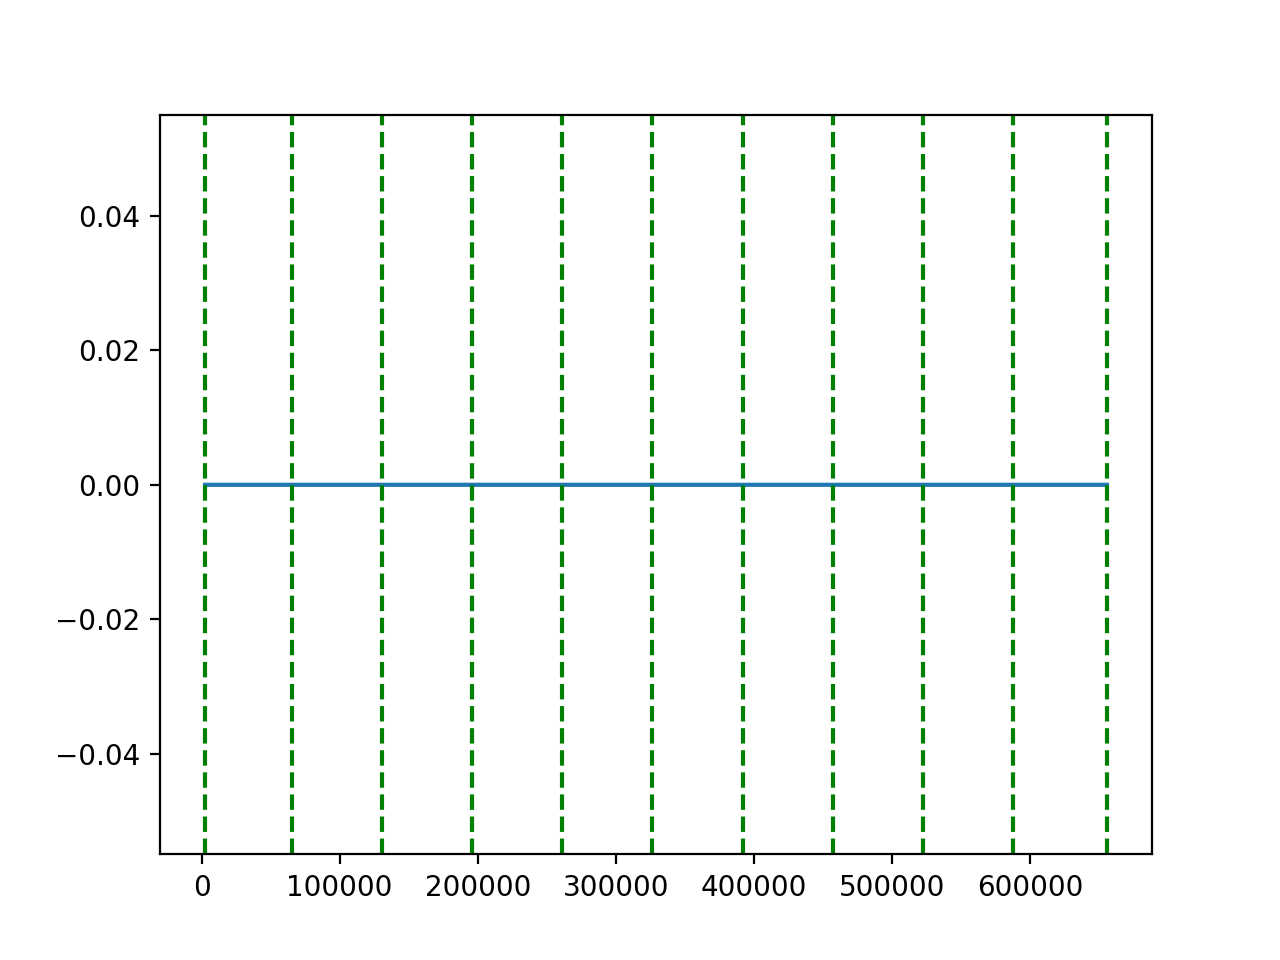

In [146]:
plt.figure()
plt.plot(focus_ax,np.zeros(5483))
plt.axvline(x = 2565, color ="green", linestyle ="--")
plt.axvline(x = 65291, color ="green", linestyle ="--")
plt.axvline(x = 130582, color ="green", linestyle ="--")
plt.axvline(x = 195873, color ="green", linestyle ="--")
plt.axvline(x = 261164, color ="green", linestyle ="--")
plt.axvline(x = 326455, color ="green", linestyle ="--")
plt.axvline(x = 391746, color ="green", linestyle ="--")
plt.axvline(x = 457037, color ="green", linestyle ="--")
plt.axvline(x = 522328, color ="green", linestyle ="--")
plt.axvline(x = 587619, color ="green", linestyle ="--")
plt.axvline(x = 655476, color ="green", linestyle ="--")

plt.show()

# Statistic: Useful cutouts

The number of useful cutouts inside each batch is as following:

- 1st batch: 0 (out of 100 random cutout)
- 2nd batch: 0 (out of 100 random cutout)
- 3rd batch: 0 (out of 100 random cutout)
- 4th batch: 31 (out of 100 random cutout)
- 5th batch: 56 (out of 100 random cutout)
- 6th batch: 62 (out of 100 random cutout)
- 7th batch: 90 (out of 100 random cutout)
- 8th batch: 12 (out of 26 random cutout)
- 9th batch: 1 (out of 11 random cutout)
- 10th batch: 1 (out of 3 random cutout)

In total, 253 cutouts are useful.

<IPython.core.display.Javascript object>


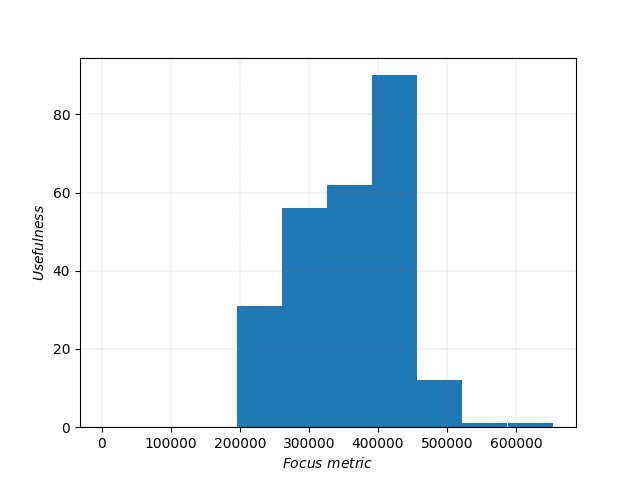

In [5]:
binwidth = 65291

focus = [2565,65291,130582,195873,261164,326455,391746,457037,522328,587619,655476]
Usefulness = [0,0,0,31,56,62,90,12,1,1] 
plt.figure()

bin_centers = np.array([(focus[i] + focus[i+1])/2 for i in range(len(Usefulness))])
plt.bar(bin_centers, Usefulness, width=binwidth)
#plt.plot(bin_centers, yhist/2, 'ko:')
plt.xlabel('$Focus$ $metric$')
plt.ylabel('$Usefulness$')
plt.grid(c = 'grey',linestyle=':', linewidth=0.3)
plt.show()

<IPython.core.display.Javascript object>


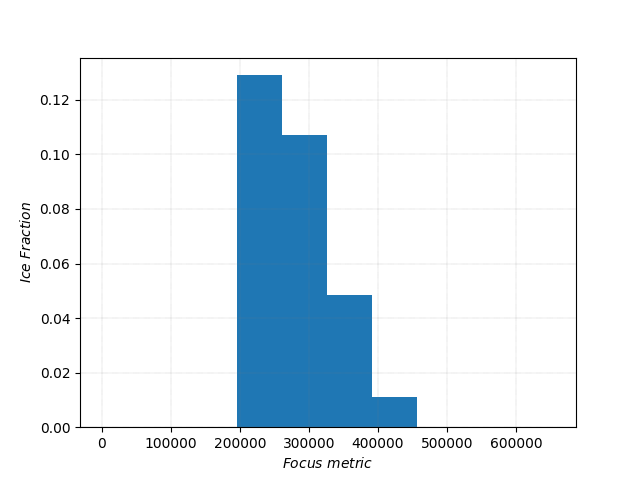

array([0.        , 0.        , 0.        , 0.12903226, 0.10714286,
       0.0483871 , 0.01111111, 0.        , 0.        , 0.        ])

In [6]:
batch_ice = [0,0,0,4,6,3,1,0,0,0]
Usefulness = [0,0,0,31,56,62,90,12,1,1] 


focus = [2565,65291,130582,195873,261164,326455,391746,457037,522328,587619,655476]

batch_fraction = np.array(batch_ice, dtype=np.float)
batch_fraction[np.where(np.array(Usefulness) > 0)] = np.array(batch_ice, dtype=np.float)[np.where(np.array(Usefulness) > 0)]/np.array(Usefulness)[np.where(np.array(Usefulness) > 0)]

plt.figure()

bin_centers = np.array([(focus[i] + focus[i+1])/2 for i in range(len(batch_fraction))])
plt.bar(bin_centers, batch_fraction, width=binwidth)
#plt.plot(bin_centers, yhist/2, 'ko:')
plt.xlabel('$Focus$ $metric$')
plt.ylabel('$Ice$ $Fraction$')
plt.grid(c = 'grey',linestyle=':', linewidth=0.3)
plt.show()
batch_fraction

# Ice statistic

Among the random chosen cutouts, from those that are useful (focused, complete cut), we estimate the ice fraction. From previous section, total useful droplets that were randomly chosen are 253. Therefore, the ice fraction are calculated out of 253 droplets.

- 1st batch: 0
- 2nd batch: 0
- 3rd batch: 0 
- 4th batch: 3 side-blob, 1 rippling
- 5th batch: 1 side-blob, 3 rippling, 2 distorted
- 6th batch: 3 rippling
- 7th batch: 1 side-blob
- 8th batch: 0
- 9th batch: 0
- 10th batch: 0


In total, we have 7 rippling, 5 side-blob and 2 distorted (14 frozen droplet). therefore ice fraction is 0.055.


<IPython.core.display.Javascript object>


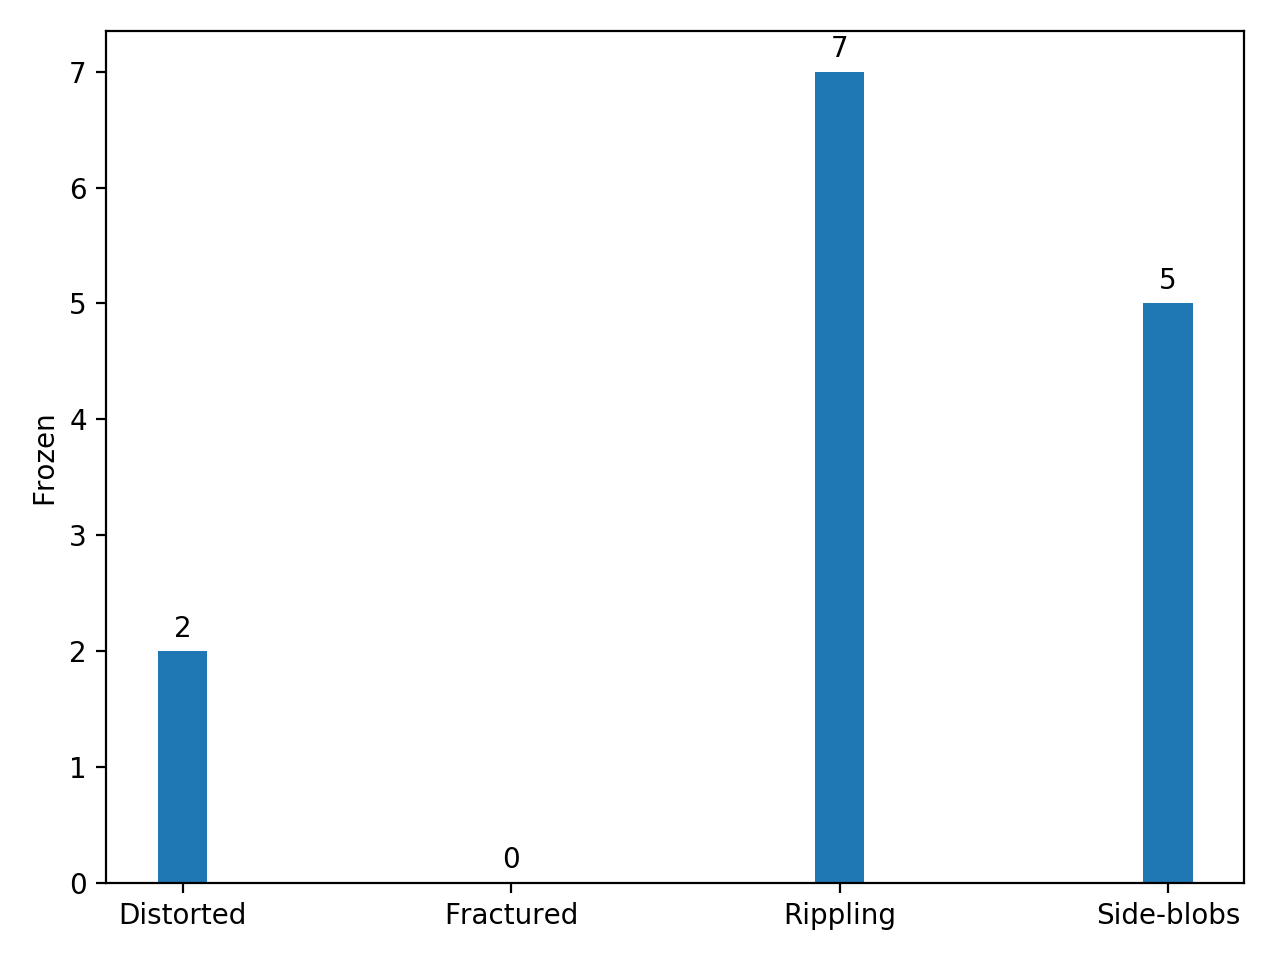

In [184]:
labels = ['Distorted', 'Fractured', 'Rippling', 'Side-blobs']

fraction = [2, 0, 7, 5]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , fraction, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frozen')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()